# Linear Simple

An simple least squares linear regression implemented in STAN.

In [1]:
import numpy as np

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import matplotlib.pyplot as plt

import pystan

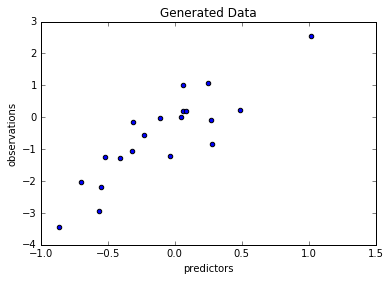

In [2]:
N = 20
l = .5

predictors = l*np.random.randn(N)
noise = np.random.randn(N)

observations = 2. * predictors + noise

fig, ax = plt.subplots(1,1)
ax.set_title('Generated Data')
ax.set_xlabel('predictors')
ax.set_ylabel('observations')
ax.scatter(predictors, observations)
fig.show()

In [3]:
model_code = """
data {
    int N;
    vector[N] x;
    vector[N] y;
}

parameters {
    real beta;
    real alpha;
}

model {
    y ~ normal(beta * x + alpha, 1);
}
"""
model = pystan.StanModel(model_code=model_code)

In [4]:
fit = model.sampling(data=dict(N=N, x=predictors, y=observations))

In [5]:
print fit

Inference for Stan model: anon_model_ce3df646c9eeeb7a750582c66fd1925e.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
beta    2.75    0.01    0.5   1.78    2.4   2.74   3.08   3.73 1122.0    1.0
alpha  -0.31  6.7e-3   0.22  -0.73  -0.46  -0.31  -0.16   0.13 1116.0    1.0
lp__   -5.52    0.03   0.96  -8.02  -5.89  -5.22  -4.83  -4.58  811.0    1.0

Samples were drawn using NUTS(diag_e) at Thu Mar  3 16:30:27 2016.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


In [6]:
samples = fit.extract()

In [7]:
alpha = samples['alpha'][:, np.newaxis]
beta  = samples['beta'][:, np.newaxis]
mx  = np.linspace(np.floor(np.min(predictors)) - 1, np.ceil(np.max(predictors)) + 1)
yxx = np.outer(beta, mx) + alpha

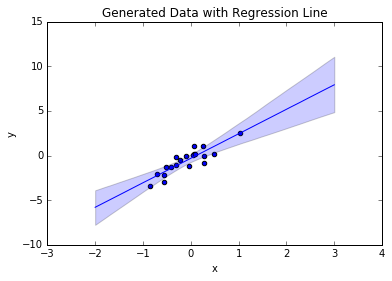

In [8]:
ymed = np.percentile(yxx,   50, axis=0)
ymin = np.percentile(yxx,  2.5, axis=0)
ymax = np.percentile(yxx, 97.5, axis=0)

fig, ax = plt.subplots(1, 1)
ax.set_title('Generated Data with Regression Line')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.scatter(predictors, observations)
ax.plot(mx, ymed)
ax.fill_between(mx, ymin, ymax, alpha=0.2)
fig.show()